<a href="https://colab.research.google.com/github/ArnavJalan-30/digital_image_processing/blob/main/Morphological_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite
* Load required packages and load images (already uploaded on  MSTeams files) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the demo on Blackboard by April 23, 2024 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following opencv functions for any type of opencv operations**

>[cv.imread](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56),
>[cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04),
>[cv.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab),
>[cv.getGaussianKernel](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa),
>[cv.getDerivKernels](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea),
>[cv.erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)
>[cv.dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)

> [all core operations](https://docs.opencv.org/3.4/d2/de8/group__core__array.html) {e.g. Matrix Addition, Subtraction, Multiplication, Inverse, Finding Min-Max in Matrix, Element-wise Power of Matrix, and much more...}

#DEMO for Morphological Processing

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 1) Display following stages
## a) Load 'A.png'

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


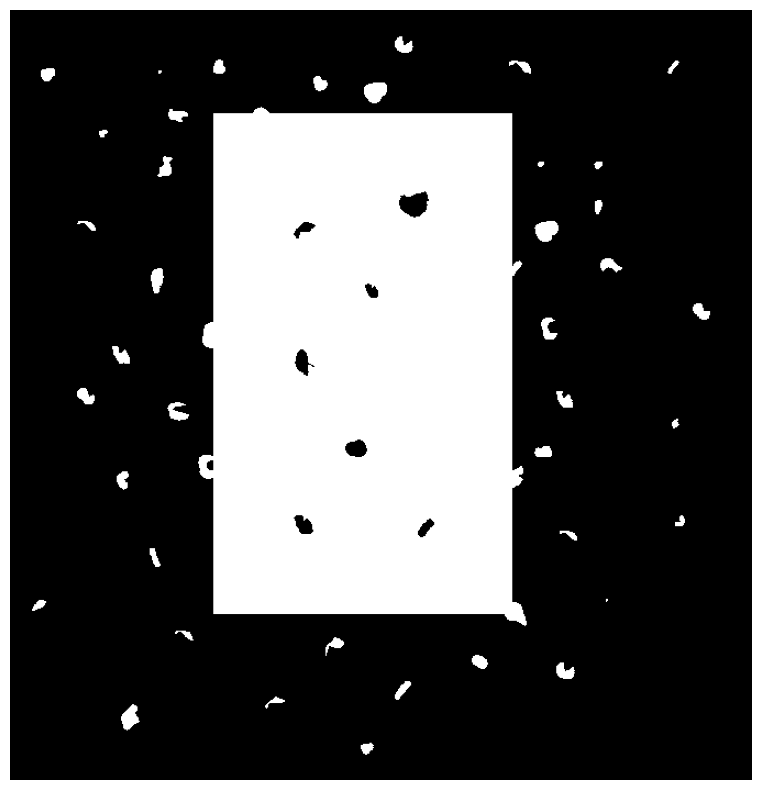

In [2]:
#@title
img =  cv.imread('/content/A.png', cv.IMREAD_GRAYSCALE)
kernel_sz1 = np.ones(1)
## Change Data type of image ####################
img = cv.filter2D(img, cv.CV_16U, kernel_sz1)
#################################################
thresh = 127
img = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)[1]
print('Data_type is {}', img.dtype)
print('Image Size is {}'.format(img.shape))
print('Image min and max are ({}, {})'.format(img.min(),img.max()))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

##b) Define and display $20\times20$ rectangular structuring element

Data_type is {} uint8
Image Size is (20, 20)
Image min and max are (1, 1)


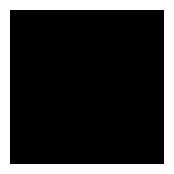

In [3]:
#@title
SE1	=	cv.getStructuringElement(	cv.MORPH_RECT, (20,20))

print('Data_type is {}', SE1.dtype)
print('Image Size is {}'.format(SE1.shape))
print('Image min and max are ({}, {})'.format(SE1.min(),SE1.max()))
plt.figure(figsize=(2,2))
plt.imshow(SE1, cmap='gray')
plt.axis('off')
plt.show()

##c) Erode a) with b)

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


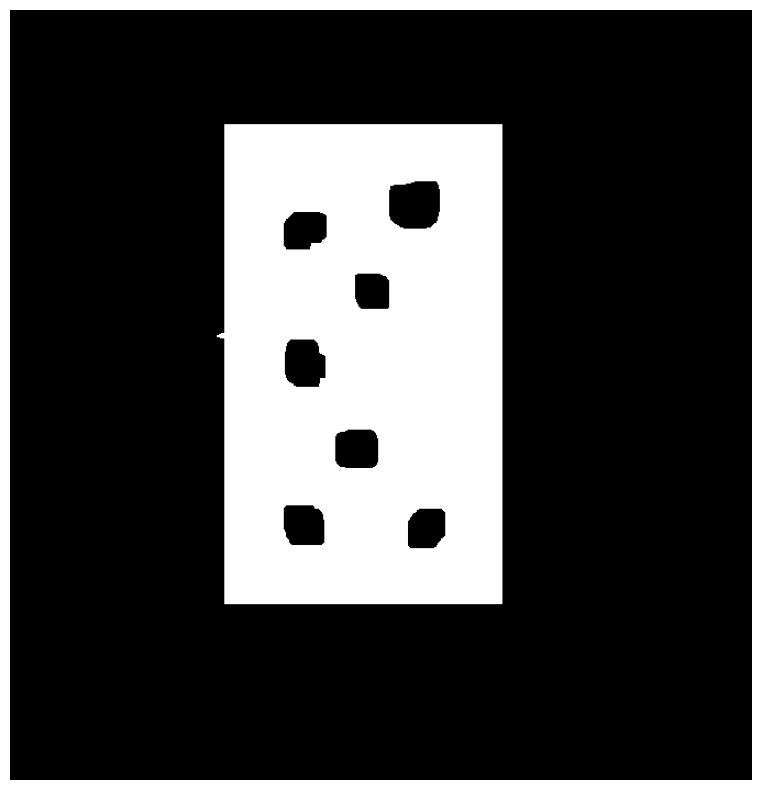

In [4]:
#@title
img_erode = cv.erode(img, SE1,iterations = 1)
print('Data_type is {}', img_erode.dtype)
print('Image Size is {}'.format(img_erode.shape))
print('Image min and max are ({}, {})'.format(img_erode.min(),img_erode.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_erode, cmap='gray')
plt.axis('off')
plt.show()

##d) dilate c) with b) two times

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


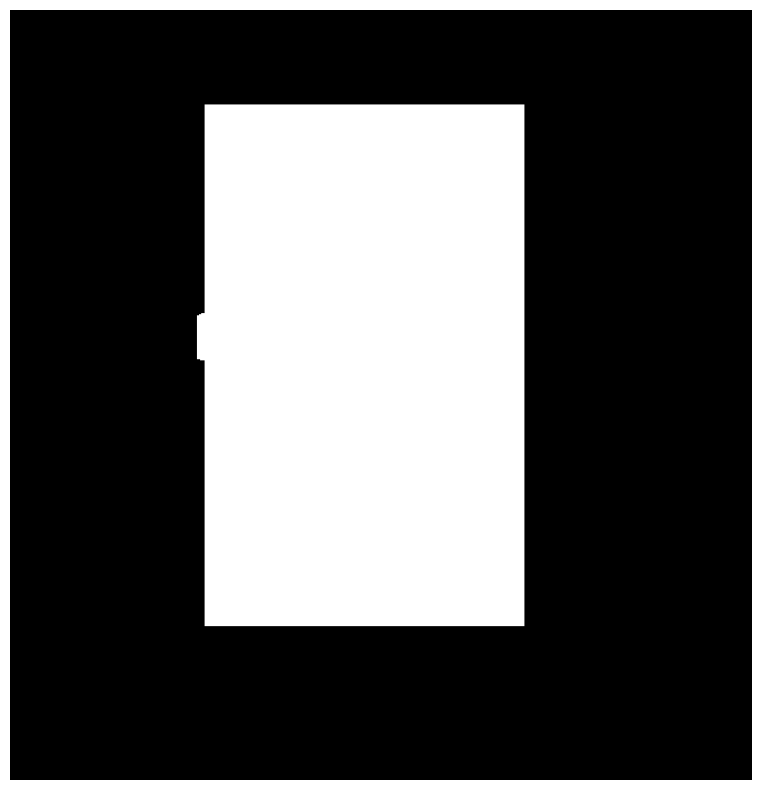

In [5]:
#@title
img_e_d = cv.dilate(img_erode, SE1,iterations = 2)
print('Data_type is {}', img_e_d.dtype)
print('Image Size is {}'.format(img_e_d.shape))
print('Image min and max are ({}, {})'.format(img_e_d.min(),img_e_d.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d, cmap='gray')
plt.axis('off')
plt.show()

##e) erode d) with b) three times then dilate the output with $4\times4$ rectangular structuring element 8 times

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


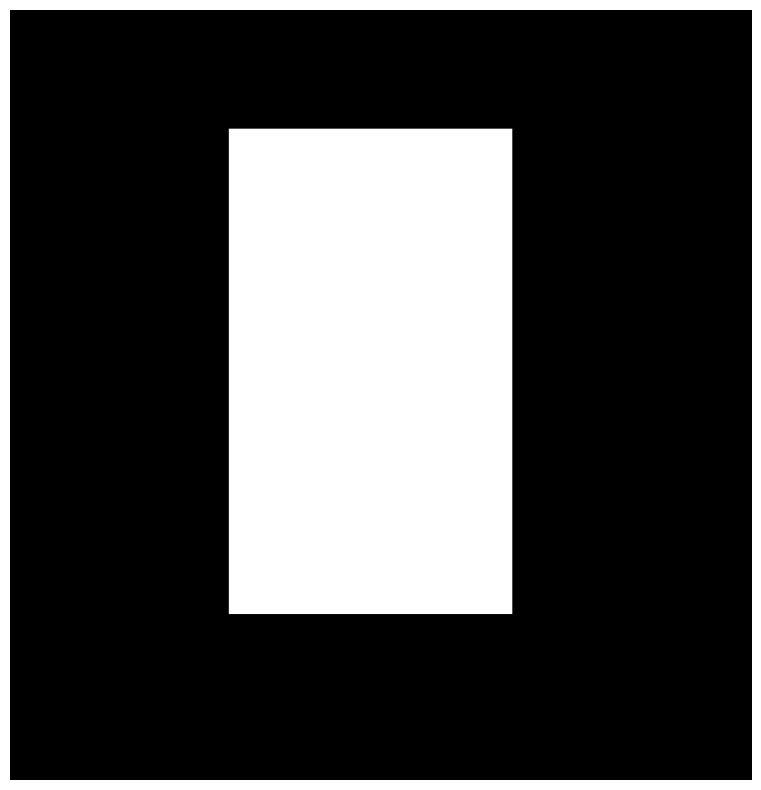

In [6]:
#@title
img_e_d_d_e = cv.erode(img_e_d, SE1,iterations = 3)

SE2	=	cv.getStructuringElement(	cv.MORPH_RECT, (4,4))
img_e_d_d_e = cv.dilate(img_e_d_d_e, SE2,iterations = 8)

#SE3	=	cv.getStructuringElement(	cv.MORPH_RECT, (4,4),(0,0))
#img_e_d_d_e = cv.dilate(img_e_d_d_e, SE3,iterations = 6)

print('Data_type is {}', img_e_d_d_e.dtype)
print('Image Size is {}'.format(img_e_d_d_e.shape))
print('Image min and max are ({}, {})'.format(img_e_d_d_e.min(),img_e_d_d_e.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d_d_e, cmap='gray')
plt.axis('off')
plt.show()

##f) xor a) with e)

> Indented block



Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


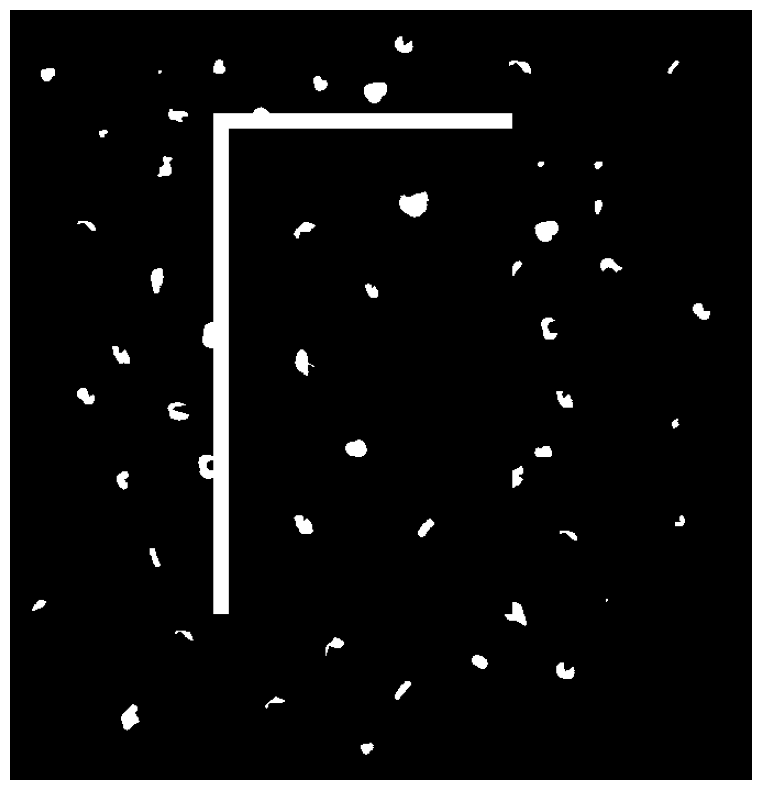

In [7]:
#@title
img_b = cv.bitwise_xor(img, img_e_d_d_e)
print('Data_type is {}', img_b.dtype)
print('Image Size is {}'.format(img_b.shape))
print('Image min and max are ({}, {})'.format(img_b.min(),img_b.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.show()

##g) Design a shifting operation using dilation by changing origin of structuring element, so that whole binary image is shifted. Shift e) in such a way, after xor with a) rectangle disappears from a). Display final image.

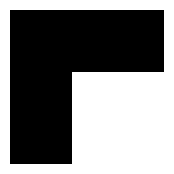

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


(-0.5, 674.5, 700.5, -0.5)

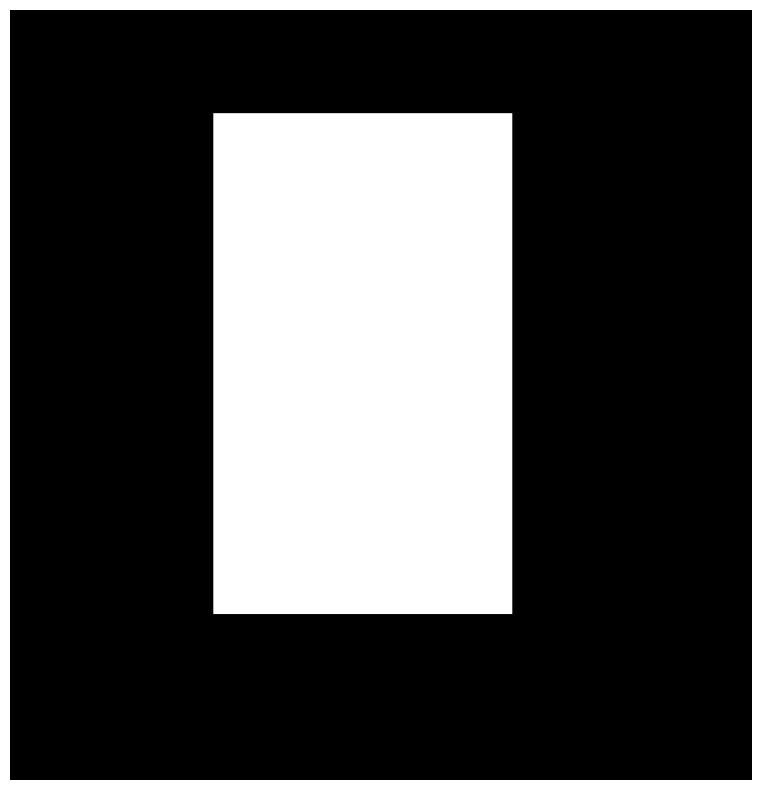

In [8]:
#@title
#SE3	=	cv.getStructuringElement(	cv.MORPH_RECT, (3,3),anchor=(-1,-1))
SE3 = np.zeros((5,5),dtype=np.uint8)
SE3[2:,2:] = 1

plt.figure(figsize=(2,2))
plt.imshow(SE3, cmap='gray')
plt.axis('off')
plt.show()

img_e_d_d_e1 = cv.dilate(img_e_d_d_e, SE3,iterations = 7)

print('Data_type is {}', img_e_d_d_e1.dtype)
print('Image Size is {}'.format(img_e_d_d_e1.shape))
print('Image min and max are ({}, {})'.format(img_e_d_d_e1.min(),img_e_d_d_e1.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d_d_e1, cmap='gray')
plt.axis('off')
#plt.show()

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


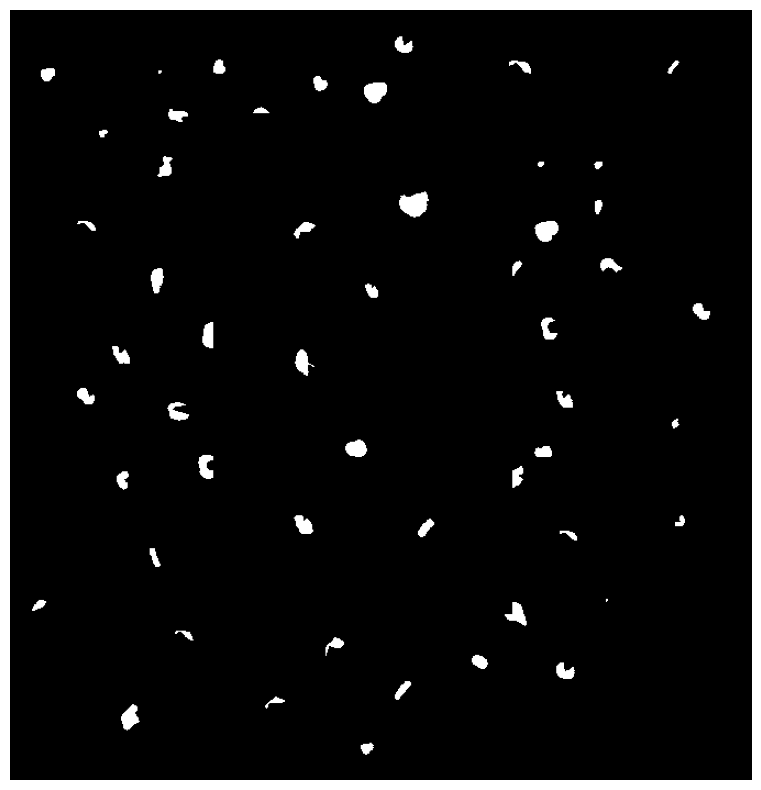

In [9]:
#@title
img_c = cv.bitwise_xor(img, img_e_d_d_e1)
print('Data_type is {}', img_c.dtype)
print('Image Size is {}'.format(img_c.shape))
print('Image min and max are ({}, {})'.format(img_c.min(),img_c.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

#LAB Assignment [15 Marks]

# Q1) Remove 'T' from 'UTK.tif' using structuring element in 'T.tif' with the help of erosion,dilation, xor and and operations ONLY. Display and explain final output.
#[5 Marks]

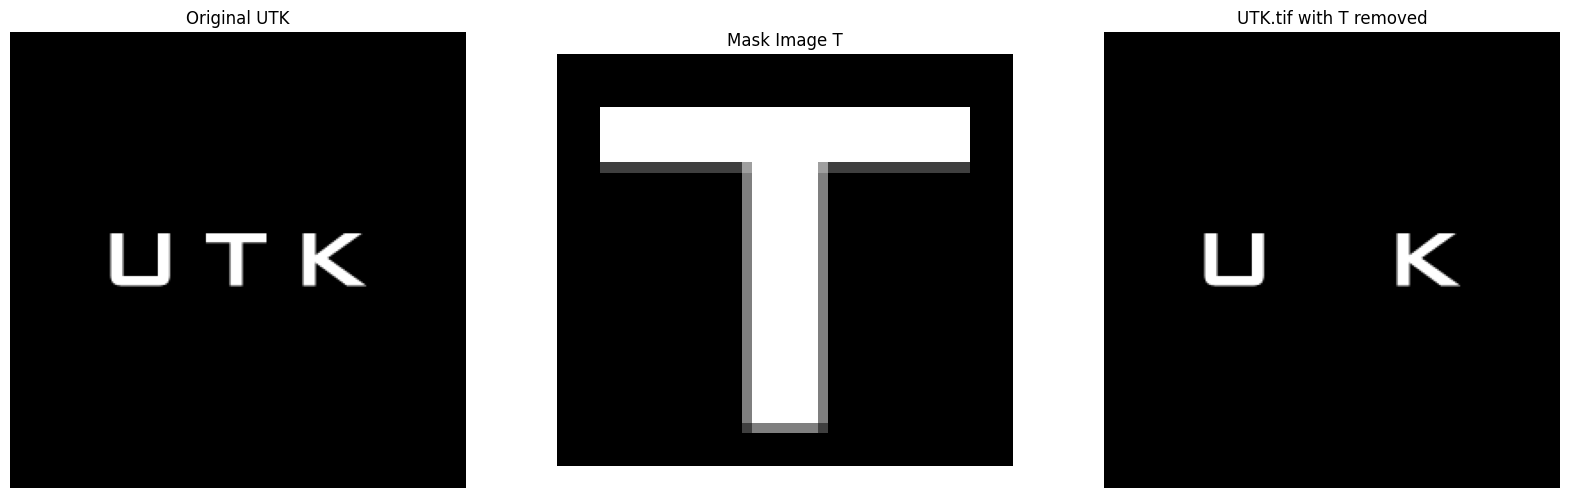

In [41]:
img_utk = cv.imread('/content/UTK.tif', cv.IMREAD_GRAYSCALE)
img_t = cv.imread('/content/T.tif', cv.IMREAD_GRAYSCALE)

mask_resized = cv.resize(img_t, (img_utk.shape[1], img_utk.shape[0]))

_, mask = cv.threshold(mask_resized, 127, 255, cv.THRESH_BINARY)

mask = cv.bitwise_not(mask)

img_removed_t = cv.bitwise_and(img_utk, mask)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_utk, cmap='gray')
plt.title('Original UTK')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_t, cmap='gray')
plt.title('Mask Image T')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_removed_t, cmap='gray')
plt.title('UTK.tif with T removed')
plt.axis('off')

plt.show()


# EXPLANATION:

The code assumes the 'T' character in the template image has a clear foreground (white pixels) against a dark background. It leverages the fact that overlapping a black region in the mask with a matching region in the original image effectively removes that region from the final output.


*  Resize the template image to match the dimensions of the original image.
*   Convert the resized template image into a binary mask using thresholding (separates foreground from background) and then invert it (make the 'T' black).
*   Perform a bitwise AND operation between the original image and the inverted mask. This operation retains pixels from the original image only where the corresponding pixels in the mask are white (which excludes the 'T' region).
*   The resulting image has the 'T' character removed wherever it matched the template.






# Q2)Extract middle large bone from 'B.tif' with the help of erosion,dilation, xor,and and threshold operations ONLY. Create your structuring elements as per requirement.Display the binary image of middle large bone and explain the process.
#[10 Marks]

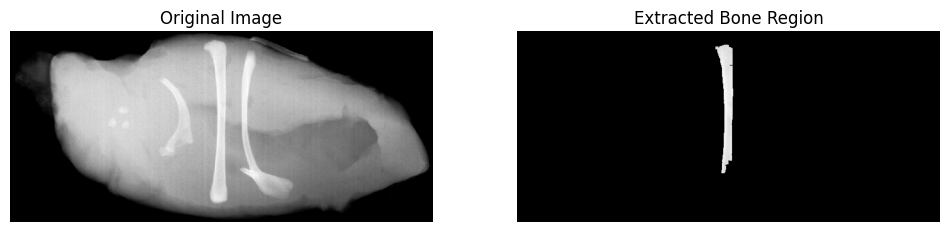

In [29]:
b_img = cv.imread('B.tif', cv.IMREAD_GRAYSCALE)

if b_img is None:
    print("Error: Failed to load image 'B.tif'.")
else:

    _, binary_img = cv.threshold(b_img, 190, 255, cv.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    processed_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

    contours, _ = cv.findContours(processed_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Finding the largest contour (assuming it's the bone)
    largest_contour = max(contours, key=cv.contourArea)

    bone_mask = np.zeros_like(b_img)
    cv.drawContours(bone_mask, [largest_contour], -1, (255), thickness=cv.FILLED)

    bone_image = cv.bitwise_and(b_img, bone_mask)
    black_background = np.zeros_like(b_img)
    height, width = black_background.shape[:2]

    x_offset = (width - bone_image.shape[1]) // 2
    y_offset = (height - bone_image.shape[0]) // 2
    black_background[y_offset:y_offset + bone_image.shape[0], x_offset:x_offset + bone_image.shape[1]] = bone_image

    plt.figure(figsize=(12, 6))

    # Plot the original image with extracted bone region highlighted
    plt.subplot(1, 2, 1)
    plt.imshow(b_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the extracted bone region with surroundings
    plt.subplot(1, 2, 2)
    plt.imshow(black_background, cmap='gray')
    plt.title('Extracted Bone Region')
    plt.axis('off')

    plt.show()


EXPLANATION

- Thresholding: Converts the grayscale image into a binary image, where pixels above a certain intensity threshold are set to white (255) and the rest to black (0).

- Morphological Opening: Performs morphological opening on the binary image to smooth the edges and remove noise. This involves erosion followed by dilation using a defined kernel.

- Contour Detection: Identifies contours in the processed image, aiming to find the bone region. It assumes the largest contour represents the bone.

- Bone Extraction: Extracts the bone region by creating a binary mask of the largest contour and applying it to the original grayscale image using bitwise AND operation. This isolates the bone region from the rest of the image.
